In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import boston_housing
from keras.layers import Dense, Flatten
from keras.models import  Sequential
from keras.optimizers import Adam

In [2]:
(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [3]:
train_data.shape

(404, 13)

In [6]:
mean_train = train_data.mean(axis=0)
std_train = train_data.std(axis=0)
train_nor = (train_data-mean_train)/std_train

In [7]:
mean_test = test_data.mean(axis=0)
std_test = test_data.std(axis=0)
test_nor = (test_data-mean_test)/std_test

In [36]:
def build_model():
    model = Sequential()
    model.add(Dense(128, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate = 0.001), loss='mse', metrics=['mae'])
    return model

In [24]:
k = 5
num_val_samples = len(train_data)//k
num_epochs = 200
all_mae_histories = []
for i in range(k):
  val_data = train_nor[i*num_val_samples: (i+1)*num_val_samples]
  val_targets = train_targets[i*num_val_samples: (i+1)*num_val_samples]
  partial_train_nor = np.concatenate(
        [train_nor[:i * num_val_samples],
         train_nor[(i + 1) * num_val_samples:]],
        axis=0)
  partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
  model = build_model()
    
  history = model.fit(partial_train_nor, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
  mae_history = history.history['val_mae']
  all_mae_histories.append(mae_history)

In [25]:
np.mean(all_mae_histories, axis=0)

array([9.84588737, 4.66696725, 3.87452545, 3.57442317, 3.39086113,
       3.15087161, 3.10570507, 2.93874984, 2.92992816, 2.76047688,
       2.71101604, 2.61860018, 2.63296552, 2.57232461, 2.49735515,
       2.48495646, 2.46978588, 2.43281682, 2.42470245, 2.44392316,
       2.45803528, 2.45134199, 2.39576175, 2.37222278, 2.3859395 ,
       2.40925326, 2.34814196, 2.30196702, 2.33917289, 2.39707868,
       2.37869072, 2.30893221, 2.42060618, 2.35504704, 2.30991037,
       2.34500999, 2.38229294, 2.36263433, 2.33654842, 2.27627411,
       2.30304933, 2.22997336, 2.31839898, 2.2481317 , 2.24817214,
       2.29223039, 2.22009673, 2.26156223, 2.21935103, 2.26874614,
       2.27415426, 2.20602579, 2.2356281 , 2.22770042, 2.23582668,
       2.2827456 , 2.24604764, 2.31048026, 2.31135602, 2.31777816,
       2.20808382, 2.27368841, 2.23596122, 2.1991523 , 2.23989275,
       2.21342616, 2.25708251, 2.29624066, 2.23112006, 2.27921767,
       2.2547874 , 2.1823431 , 2.24608197, 2.25065618, 2.18975

In [26]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

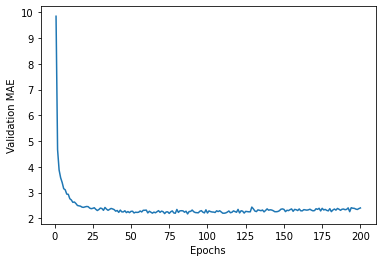

In [27]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [37]:

model = build_model()

model.fit(train_nor, train_targets,
          epochs=200, batch_size=1, verbose=0)


In [39]:
test_mse_score, test_mae_score = model.evaluate(test_nor, test_targets)

4/4 [==============================] - 0s 2ms/step - loss: 13.4485 - mae: 2.6571
